In [1]:
import pandas as pd

low = pd.read_hdf('../data/raw/misc/downscaled_events_1.18.h5')
high = pd.read_hdf('../data/raw/misc/downscaled_events.h5')

In [2]:
high.y.max()

159

In [3]:
from dynamic_fusion.data_generator.configuration import EventDiscretizerConfiguration
from dynamic_fusion.data_generator.event_discretizer import EventDiscretizer

THRESHOLD = 1
config = EventDiscretizerConfiguration(number_of_temporal_bins=100, number_of_temporal_sub_bins_per_bin=2)
discretizer = EventDiscretizer(config, max_timestamp=20.)

discretized_events = discretizer.run({1.18: low, 1.3: high}, image_resolution=(160, 106))

/home/davton/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
discretized_events[1.18].event_polarity_sum.shape

torch.Size([100, 2, 160, 106])

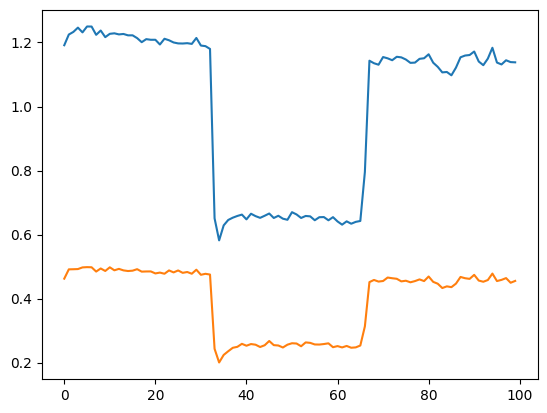

In [30]:
from matplotlib import pyplot as plt

plt.plot(discretized_events[1.18].event_count.sum(dim=1).mean(dim=(1,2)))
plt.plot(discretized_events[1.3].event_count.sum(dim=1).mean(dim=(1,2)))

In [33]:
from dynamic_fusion.utils.network import to_numpy
from dynamic_fusion.utils.visualization import create_red_blue_cmap, img_to_colormap


colored_event_polarity_sums_low = img_to_colormap(to_numpy(discretized_events[1.18].event_polarity_sum.sum(dim=1)), create_red_blue_cmap(501))
colored_event_polarity_sums_high = img_to_colormap(to_numpy(discretized_events[1.3].event_polarity_sum.sum(dim=1)), create_red_blue_cmap(501))

eppfs_low = discretized_events[1.18].event_count.sum(dim=1).mean(dim=(1,2))
eppfs_high = discretized_events[1.3].event_count.sum(dim=1).mean(dim=(1,2))

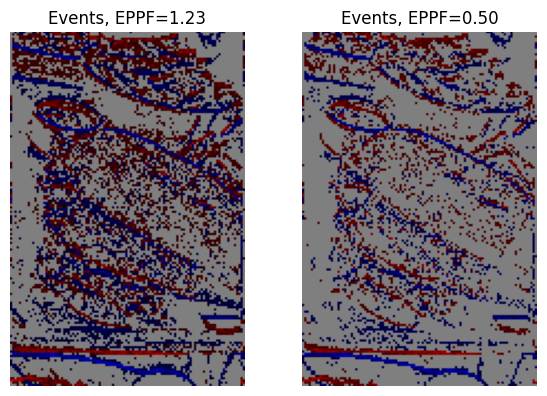

In [48]:
I = 10

fig, axs = plt.subplots(1, 2, figsize=(6, 5)) # figsize can be adjusted as needed
plt.tight_layout()

axs[1].imshow(colored_event_polarity_sums_high[I])
axs[1].set_title(f"Events, EPPF={eppfs_high[I]:.2f}")
axs[1].axis('off')


axs[0].imshow(colored_event_polarity_sums_low[I])
axs[0].set_title(f"Events, EPPF={eppfs_low[I]:.2f}")
axs[0].axis('off')
plt.show()



matplotlib.axes._axes.Axes

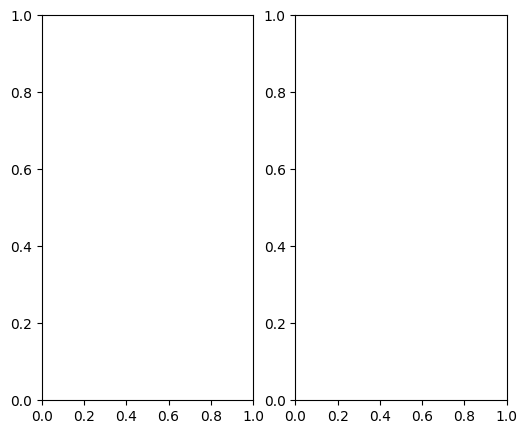

In [3]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(6, 5)) # figsize can be adjusted as needed
type(axs[0])
